In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline
plt.rcParams["figure.figsize"] = 12,8

In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,recall_score

In [3]:
# Identifying the proper column names to the data set.

#column names
names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
         "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations",
         "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
         "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
         "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
         "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
         "dst_host_srv_rerror_rate","attack", "last_flag"]

data_train = pd.read_csv(r"E:\DSP\DSP_22nd Nov\Machine Learning\FInal Class\Case Studies & FInal Projects\3\NSL_Dataset\Train.txt",names=names)
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
# Identifying the proper column names to the data set.

#column names
names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
         "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations",
         "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
         "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
         "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
         "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
         "dst_host_srv_rerror_rate","attack", "last_flag"]

data_test = pd.read_csv(r"E:\DSP\DSP_22nd Nov\Machine Learning\FInal Class\Case Studies & FInal Projects\3\NSL_Dataset\Test.txt",names=names)
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [5]:
data_train.info()  # 43 variables here 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
duration                       22544 non-null int64
protocol_type                  22544 non-null object
service                        22544 non-null object
flag                           22544 non-null object
src_bytes                      22544 non-null int64
dst_bytes                      22544 non-null int64
land                           22544 non-null int64
wrong_fragment                 22544 non-null int64
urgent                         22544 non-null int64
hot                            22544 non-null int64
num_failed_logins              22544 non-null int64
logged_in                      22544 non-null int64
num_compromised                22544 non-null int64
root_shell                     22544 non-null int64
su_attempted                   22544 non-null int64
num_root                       22544 non-null int64
num_file_creations             22544 non-null int64
num_

In [7]:
# From Pandas Profiling,We have dropped the same variables and we are left with 35 variables in our train data set.

data_train.drop(columns=["dst_host_rerror_rate","dst_host_serror_rate","dst_host_srv_rerror_rate",
                        "dst_host_srv_serror_rate","num_outbound_cmds","num_root","srv_rerror_rate","srv_serror_rate"],axis = 1,inplace = True)

In [8]:
# From Pandas Profiling,We have dropped the same variables and we are left with 35 variables in our test data set.

data_test.drop(columns=["dst_host_rerror_rate","dst_host_serror_rate","dst_host_srv_rerror_rate",
                        "dst_host_srv_serror_rate","num_outbound_cmds","num_root","srv_rerror_rate","srv_serror_rate"],axis = 1,inplace = True)

In [9]:
#mapping attack type

ddos = ['back','land','neptune','pod','smurf','teardrop','apache2','udpstorm','processtable','worm']
probe = ['satan','ipsweep','nmap','portsweep','mscan','saint']
r2l = ['guess_passwd','ftp_write','imap','phf','multihop','warezmaster','warezclient','spy','xlock','xsnoop','snmpguess','snmpgetattack','httptunnel','sendmail','named']
u2r = ['buffer_overflow','loadmodule','rootkit','perl','sqlattack','xterm','ps']

#defining a function to label attacks
def map_attack(attack):
    if attack['attack'] in ddos:
        return 'ddos'
    elif attack['attack'] in probe:
        return 'probe'
    elif attack['attack'] in r2l:
        return 'r2l'
    elif attack['attack'] in u2r:
        return 'u2r'
    else:
        return 'normal'

#making a new column 'attack_type' on both test and train set
data_train['new_attack_type'] = data_train[['attack']].apply(map_attack, axis = 1)
data_test['new_attack_type'] = data_test[['attack']].apply(map_attack, axis = 1)

In [10]:
data_train.head() # After dropping 8 variables, 35 left then added a single variables ,total 36

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack,last_flag,new_attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.00,150,25,0.17,0.03,0.17,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,255,1,0.00,0.60,0.88,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,255,26,0.10,0.05,0.00,0.00,neptune,19,ddos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,30,255,1.00,0.00,0.03,0.04,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.09,255,255,1.00,0.00,0.00,0.00,normal,21,normal


In [11]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack,last_flag,new_attack_type
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,255,10,0.04,0.06,0.00,0.00,neptune,21,ddos
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,255,1,0.00,0.06,0.00,0.00,neptune,21,ddos
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.00,134,86,0.61,0.04,0.61,0.02,normal,21,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,3,57,1.00,0.00,1.00,0.28,saint,15,probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.75,29,86,0.31,0.17,0.03,0.02,mscan,11,probe


In [12]:
# Added 1 variable here and dropped another variable as per the requirement
data_train.drop(["attack"],axis=1,inplace=True)
data_test.drop(["attack"],axis =1 ,inplace=True)

In [13]:
data_train.info() # 35 variables in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 35 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_file_creations             125973 non-null int64
num_shells                     125973 

In [14]:
data_test.info() # 35 variables in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 35 columns):
duration                       22544 non-null int64
protocol_type                  22544 non-null object
service                        22544 non-null object
flag                           22544 non-null object
src_bytes                      22544 non-null int64
dst_bytes                      22544 non-null int64
land                           22544 non-null int64
wrong_fragment                 22544 non-null int64
urgent                         22544 non-null int64
hot                            22544 non-null int64
num_failed_logins              22544 non-null int64
logged_in                      22544 non-null int64
num_compromised                22544 non-null int64
root_shell                     22544 non-null int64
su_attempted                   22544 non-null int64
num_file_creations             22544 non-null int64
num_shells                     22544 non-null int64
num_

In [15]:
data_train.new_attack_type.value_counts()

normal    67343
ddos      45927
probe     11656
r2l         995
u2r          52
Name: new_attack_type, dtype: int64

In [16]:
data_test.new_attack_type.value_counts()

normal    10004
ddos       7167
r2l        2885
probe      2421
u2r          67
Name: new_attack_type, dtype: int64

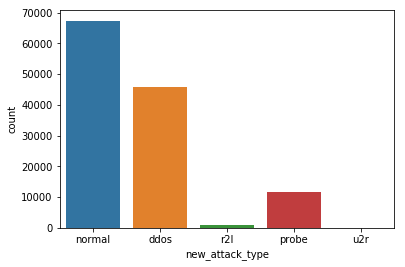

In [17]:
sns.countplot(data_train["new_attack_type"])

#### IN the Train data , Most of the attacks are Normal 
#### Other than Normal , ddos and probe are the most in numbers whereas r2l and u2r are very less in numbers 

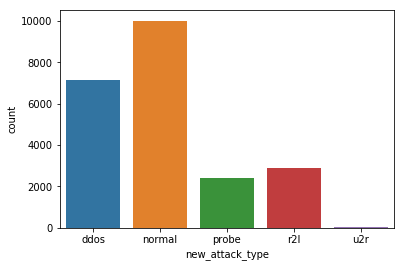

In [18]:
sns.countplot(data_test["new_attack_type"])

#### In the test data , most of the attacks are normal as also found in the train data.
#### In the non-normal type , ddos ,r2l and probe are present in good numbers.

In [19]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,last_flag,new_attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.00,0.00,150,25,0.17,0.03,0.17,0.00,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.15,0.00,255,1,0.00,0.60,0.88,0.00,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,255,26,0.10,0.05,0.00,0.00,19,ddos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.00,30,255,1.00,0.00,0.03,0.04,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.09,255,255,1.00,0.00,0.00,0.00,21,normal


In [20]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,last_flag,new_attack_type
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,255,10,0.04,0.06,0.00,0.00,21,ddos
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,255,1,0.00,0.06,0.00,0.00,21,ddos
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.00,0.00,134,86,0.61,0.04,0.61,0.02,21,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,3,57,1.00,0.00,1.00,0.28,15,probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.00,0.75,29,86,0.31,0.17,0.03,0.02,11,probe


X = data_train.columns.difference(["new_attack_type"])

y = data_train["new_attack_type"]

In [21]:
numeric_var_names=[key for key in dict(data_train.dtypes) if dict(data_train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
print(numeric_var_names)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'last_flag']


In [22]:
cat_var_names = ['protocol_type', 'service', 'flag']

In [23]:
numeric_var_names1=[key for key in dict(data_test.dtypes) if dict(data_test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
print(numeric_var_names1)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'last_flag']


In [24]:
cat_var_names1 = ['protocol_type', 'service', 'flag']

In [25]:
data_train_cat = data_train[cat_var_names]

In [26]:
data_test_cat = data_test[cat_var_names1]

In [27]:
data_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 3 columns):
protocol_type    125973 non-null object
service          125973 non-null object
flag             125973 non-null object
dtypes: object(3)
memory usage: 2.9+ MB


In [28]:
data_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 3 columns):
protocol_type    22544 non-null object
service          22544 non-null object
flag             22544 non-null object
dtypes: object(3)
memory usage: 528.5+ KB


In [29]:
data_train_cat.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [30]:
data_test_cat.head()

,protocol_type,service,flag
0,tcp,private,REJ
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO


In [31]:
data_train_num = data_train[numeric_var_names]

In [32]:
data_test_num = data_test[numeric_var_names1]

In [33]:
data_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 31 columns):
duration                       125973 non-null int64
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_file_creations             125973 non-null int64
num_shells                     125973 non-null int64
num_access_files               125973 non-null int64
is_host_login                  125973 non-null int64
is_guest_login                 125973 non

In [34]:
data_test_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 31 columns):
duration                       22544 non-null int64
src_bytes                      22544 non-null int64
dst_bytes                      22544 non-null int64
land                           22544 non-null int64
wrong_fragment                 22544 non-null int64
urgent                         22544 non-null int64
hot                            22544 non-null int64
num_failed_logins              22544 non-null int64
logged_in                      22544 non-null int64
num_compromised                22544 non-null int64
root_shell                     22544 non-null int64
su_attempted                   22544 non-null int64
num_file_creations             22544 non-null int64
num_shells                     22544 non-null int64
num_access_files               22544 non-null int64
is_host_login                  22544 non-null int64
is_guest_login                 22544 non-null int64
count  

In [35]:
data_train_num.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,last_flag
0,0,491,0,0,0,0,0,0,0,0,...,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,20
1,0,146,0,0,0,0,0,0,0,0,...,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,15
2,0,0,0,0,0,0,0,0,0,0,...,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,19
3,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,21
4,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,21


In [734]:
# Creating Data Audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary = data_train_num.apply(lambda x: var_summary(x)).T

In [735]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,3.617247e+07,287.144650,0.00,2.604515e+03,6.783500e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.56,4.290800e+04
src_bytes,125973.0,0.0,5.740179e+09,45566.743000,44.00,5.870331e+06,3.446079e+13,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125973.0,0.0,2.491634e+09,19779.114421,0.00,4.021269e+06,1.617061e+13,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.80,8314.00,25519.00,1.309937e+09
land,125973.0,0.0,2.500000e+01,0.000198,0.00,1.408607e-02,1.984174e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.0,2.858000e+03,0.022687,0.00,2.535300e-01,6.427745e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.0,1.400000e+01,0.000111,0.00,1.436603e-02,2.063827e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.0,2.575000e+04,0.204409,0.00,2.149968e+00,4.622364e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125973.0,0.0,1.540000e+02,0.001222,0.00,4.523914e-02,2.046580e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.0,4.985200e+04,0.395736,0.00,4.890101e-01,2.391308e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
num_compromised,125973.0,0.0,3.517800e+04,0.279250,0.00,2.394204e+01,5.732214e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03


In [736]:
num_summary.to_excel("DataAuditTrainMulti.xlsx")

In [36]:
data_test_num.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,last_flag
0,0,0,0,0,0,0,0,0,0,0,...,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,21
1,0,0,0,0,0,0,0,0,0,0,...,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,21
2,2,12983,0,0,0,0,0,0,0,0,...,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,21
3,0,20,0,0,0,0,0,0,0,0,...,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,15
4,1,0,15,0,0,0,0,0,0,0,...,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,11


In [738]:
# Creating Data Audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary1 = data_test_num.apply(lambda x: var_summary(x)).T

In [739]:
num_summary1

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,22544.0,0.0,4.933959e+06,218.859076,0.00,1407.176612,1.980146e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,4.00,283.00,7589.5700,57715.0
src_bytes,22544.0,0.0,2.343550e+08,10395.450231,54.00,472786.431088,2.235270e+11,0.0,0.0,0.00,0.00,0.00,54.00,287.00,1032.00,15876.00,283618.0000,62825648.0
dst_bytes,22544.0,0.0,4.635089e+07,2056.018808,46.00,21219.297609,4.502586e+08,0.0,0.0,0.00,0.00,0.00,46.00,601.00,4099.10,8314.00,26032.0400,1345927.0
land,22544.0,0.0,7.000000e+00,0.000311,0.00,0.017619,3.104213e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,1.0
wrong_fragment,22544.0,0.0,1.900000e+02,0.008428,0.00,0.142599,2.033441e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,3.0
urgent,22544.0,0.0,1.600000e+01,0.000710,0.00,0.036473,1.330286e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,3.0
hot,22544.0,0.0,2.376000e+03,0.105394,0.00,0.928428,8.619786e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.0000,101.0
num_failed_logins,22544.0,0.0,4.880000e+02,0.021647,0.00,0.150328,2.259843e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0000,4.0
logged_in,22544.0,0.0,9.969000e+03,0.442202,0.00,0.496659,2.466703e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.0000,1.0
num_compromised,22544.0,0.0,2.703000e+03,0.119899,0.00,7.269597,5.284704e+01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0000,796.0


In [740]:
num_summary1.to_excel("DataAuditTestMulti.xlsx")

In [37]:
#subsetting service column
trainservice = data_train['service'].tolist()
testservice = data_test['service'].tolist()

In [38]:
#extracting additional service categories on training data
difference = list(set(trainservice) - set(testservice))

In [39]:
difference

['aol', 'http_2784', 'urh_i', 'http_8001', 'red_i', 'harvest']

In [40]:
#Making column names for additional serrvice features
string = 'service_'
difference=[string + x for x in difference]
difference

['service_aol',
 'service_http_2784',
 'service_urh_i',
 'service_http_8001',
 'service_red_i',
 'service_harvest']

In [41]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in data_train_cat:
    data_train_cat[c_feature] = data_train_cat[c_feature].astype('category')
    data_train_cat = create_dummies(data_train_cat , c_feature )

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in data_test_cat:
    data_test_cat[c_feature] = data_test_cat[c_feature].astype('category')
    data_test_cat = create_dummies(data_test_cat , c_feature )

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [43]:
#labelling additional columns with zeroes in test data
for col in difference:
    data_test_cat[col] = 0

In [44]:
data_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 81 columns):
protocol_type_tcp      125973 non-null uint8
protocol_type_udp      125973 non-null uint8
service_X11            125973 non-null uint8
service_Z39_50         125973 non-null uint8
service_aol            125973 non-null uint8
service_auth           125973 non-null uint8
service_bgp            125973 non-null uint8
service_courier        125973 non-null uint8
service_csnet_ns       125973 non-null uint8
service_ctf            125973 non-null uint8
service_daytime        125973 non-null uint8
service_discard        125973 non-null uint8
service_domain         125973 non-null uint8
service_domain_u       125973 non-null uint8
service_echo           125973 non-null uint8
service_eco_i          125973 non-null uint8
service_ecr_i          125973 non-null uint8
service_efs            125973 non-null uint8
service_exec           125973 non-null uint8
service_finger         125973 non-

In [45]:
data_train_cat.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
data_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 81 columns):
protocol_type_tcp      22544 non-null uint8
protocol_type_udp      22544 non-null uint8
service_X11            22544 non-null uint8
service_Z39_50         22544 non-null uint8
service_auth           22544 non-null uint8
service_bgp            22544 non-null uint8
service_courier        22544 non-null uint8
service_csnet_ns       22544 non-null uint8
service_ctf            22544 non-null uint8
service_daytime        22544 non-null uint8
service_discard        22544 non-null uint8
service_domain         22544 non-null uint8
service_domain_u       22544 non-null uint8
service_echo           22544 non-null uint8
service_eco_i          22544 non-null uint8
service_ecr_i          22544 non-null uint8
service_efs            22544 non-null uint8
service_exec           22544 non-null uint8
service_finger         22544 non-null uint8
service_ftp            22544 non-null uint8
service_ftp

In [47]:
data_test_cat.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,...,flag_S2,flag_S3,flag_SF,flag_SH,service_aol,service_http_2784,service_urh_i,service_http_8001,service_red_i,service_harvest
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


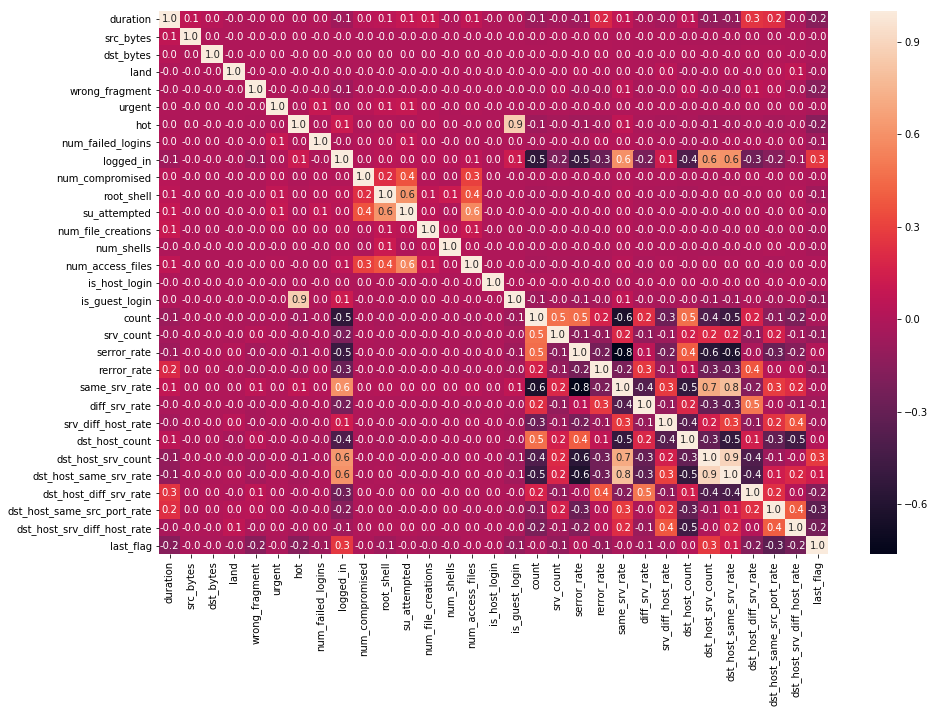

In [732]:
plt.subplots(figsize=(15,10))
sns.heatmap(data_train_num.corr(),annot = True,fmt = "1.1f")

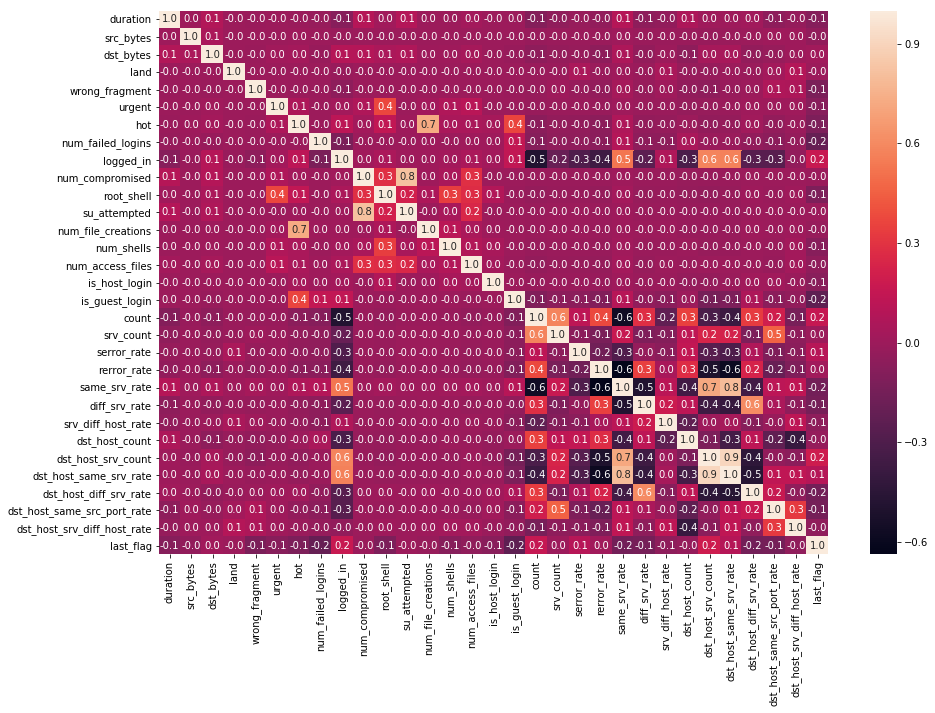

In [733]:
plt.subplots(figsize=(15,10))
sns.heatmap(data_test_num.corr(),annot = True,fmt = "1.1f")

In [741]:
corr_model = pd.concat([data_train_num,data_train.new_attack_type],axis=1)

In [743]:
corr_model = corr_model.corr()

In [744]:
corr_model

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,last_flag
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064218,0.042679,...,0.074681,-0.013738,-0.040158,0.050570,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.156311
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,0.003899,-0.000432,-0.002608,-0.005791,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.022592
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,0.003788,-0.001703,-0.001674,0.002528,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.018076
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,0.008739,-0.001551,0.038102,-0.025499,-0.014159,0.011597,-0.004516,0.033851,0.070474,-0.037038
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072418,-0.001044,...,0.054759,-0.026638,-0.026247,0.041056,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.157130
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,0.005967,-0.002705,-0.002898,-0.006941,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.016411
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002014,...,0.069365,-0.016212,-0.026781,-0.012249,-0.051864,-0.036293,-0.012293,-0.034536,-0.024715,-0.160013
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,0.019477,-0.004438,-0.010122,-0.025476,-0.023053,-0.001576,-0.001945,-0.005526,0.003302,-0.073178
logged_in,-0.064218,-0.003353,-0.002894,-0.011402,-0.072418,0.007299,0.116435,-0.006439,1.000000,0.014413,...,0.600536,-0.221323,0.131074,-0.401084,0.624365,0.604058,-0.256065,-0.160994,-0.055953,0.269818
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002014,0.019085,0.014413,1.000000,...,0.008944,-0.004035,-0.004227,-0.010928,-0.010321,-0.004995,0.002981,-0.002045,0.004252,-0.006101


In [50]:
data_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 31 columns):
duration                       125973 non-null int64
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_file_creations             125973 non-null int64
num_shells                     125973 non-null int64
num_access_files               125973 non-null int64
is_host_login                  125973 non-null int64
is_guest_login                 125973 non

In [51]:
data_test_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 31 columns):
duration                       22544 non-null int64
src_bytes                      22544 non-null int64
dst_bytes                      22544 non-null int64
land                           22544 non-null int64
wrong_fragment                 22544 non-null int64
urgent                         22544 non-null int64
hot                            22544 non-null int64
num_failed_logins              22544 non-null int64
logged_in                      22544 non-null int64
num_compromised                22544 non-null int64
root_shell                     22544 non-null int64
su_attempted                   22544 non-null int64
num_file_creations             22544 non-null int64
num_shells                     22544 non-null int64
num_access_files               22544 non-null int64
is_host_login                  22544 non-null int64
is_guest_login                 22544 non-null int64
count  

In [52]:
data_train_cat.columns

Index(['protocol_type_tcp', 'protocol_type_udp', 'service_X11',
       'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp',
       'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime',
       'service_discard', 'service_domain', 'service_domain_u', 'service_echo',
       'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec',
       'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher',
       'service_harvest', 'service_hostnames', 'service_http',
       'service_http_2784', 'service_http_443', 'service_http_8001',
       'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell',
       'service_ldap', 'service_link', 'service_login', 'service_mtp',
       'service_name', 'service_netbios_dgm', 'service_netbios_ns',
       'service_netbios_ssn', 'service_netstat', 'service_nnsp',
       'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump',
       'service_pop_2', 'service_pop_3', 'service_printer', 'se

In [53]:
data_test_cat.columns

Index(['protocol_type_tcp', 'protocol_type_udp', 'service_X11',
       'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier',
       'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard',
       'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i',
       'service_ecr_i', 'service_efs', 'service_exec', 'service_finger',
       'service_ftp', 'service_ftp_data', 'service_gopher',
       'service_hostnames', 'service_http', 'service_http_443',
       'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell',
       'service_ldap', 'service_link', 'service_login', 'service_mtp',
       'service_name', 'service_netbios_dgm', 'service_netbios_ns',
       'service_netbios_ssn', 'service_netstat', 'service_nnsp',
       'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump',
       'service_pop_2', 'service_pop_3', 'service_printer', 'service_private',
       'service_remote_job', 'service_rje', 'service_shell', 'servi

In [54]:
data_train_new = pd.concat([data_train_num,data_train_cat],axis = 1)

In [55]:
data_test_new = pd.concat([data_test_num,data_test_cat],axis=1)

In [56]:
data_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 112 entries, duration to flag_SH
dtypes: float64(9), int64(22), uint8(81)
memory usage: 39.5 MB


In [57]:
data_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Columns: 112 entries, duration to service_harvest
dtypes: float64(9), int64(28), uint8(75)
memory usage: 8.0 MB


In [58]:
data_train_new.shape

(125973, 112)

In [59]:
data_test_new.shape

(22544, 112)

In [60]:
data_train_new["Attack_type"] = data_train.new_attack_type

In [61]:
data_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 113 entries, duration to Attack_type
dtypes: float64(9), int64(22), object(1), uint8(81)
memory usage: 40.5+ MB


In [62]:
data_train_new.Attack_type.value_counts()

normal    67343
ddos      45927
probe     11656
r2l         995
u2r          52
Name: Attack_type, dtype: int64

### Select KBest

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [624]:
X = data_train_new[data_train_new.columns.difference(['Attack_type'])]  # Independent variables
X_new = SelectKBest(f_classif, k=30).fit(X,data_train_new['Attack_type'])

In [625]:
X_new.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False, False, False,
        True, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False])

In [626]:
X_new.scores_

array([2.14284531e+04, 4.56927417e+03, 5.26988211e+00, 9.43292409e+03,
       1.31026399e+04, 1.37786510e+04, 3.41042427e+04, 3.46238796e+04,
       8.17589987e+03, 1.63216657e+03, 1.66053881e+03, 3.34952321e+02,
       2.54786282e+02, 5.65940224e+03, 5.51315801e+04, 7.62261305e+01,
       2.08987014e+01, 1.29550671e+01, 5.68132279e+04, 6.48709899e+02,
       4.13719711e+03, 2.88233829e+03, 2.17648989e-01, 3.55455220e+00,
       2.01461644e+04, 3.19592485e+04, 4.54620524e+01, 3.31110190e+00,
       3.84845525e+02, 5.00184623e+01, 4.96449419e+02, 3.07927309e+03,
       1.93979328e+03, 4.48742744e+03, 2.64747538e+03, 6.80193230e+04,
       5.14262570e+04, 1.18508349e+01, 3.67700176e+02, 4.90443035e+00,
       1.45875439e+02, 2.99333382e+02, 3.14045579e+02, 2.24451089e+02,
       2.17230993e+02, 2.06620544e+02, 2.14119490e+02, 1.74185480e+02,
       2.26306980e+03, 1.68413546e+02, 1.27169511e+04, 1.10376662e+03,
       2.04156200e+02, 1.96718139e+02, 1.74116758e+02, 1.75690317e+03,
      

In [627]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, X_new.get_support())]

feature_map

#Alternative of capturing the important variables
KBest_features=X.columns[X_new.get_support()]

selected_features_from_KBest = X[KBest_features]

In [628]:
KBest_features

Index(['count', 'diff_srv_rate', 'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'dst_host_srv_diff_host_rate', 'duration',
       'flag_REJ', 'flag_RSTR', 'flag_S0', 'flag_SF', 'hot', 'is_guest_login',
       'last_flag', 'logged_in', 'protocol_type_tcp', 'protocol_type_udp',
       'rerror_rate', 'root_shell', 'same_srv_rate', 'serror_rate',
       'service_domain_u', 'service_eco_i', 'service_ftp', 'service_ftp_data',
       'service_http', 'service_private', 'srv_diff_host_rate'],
      dtype='object')

### RFE

In [270]:
#from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = data_train_new[data_train_new.columns.difference(['Attack_type'])]
logreg = LogisticRegression()
rfe = RFE(logreg, 25)  # Selecting 25 variables  
rfe = rfe.fit(X, data_train_new[['Attack_type']] )

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

In [271]:
rfe.get_support()

array([False,  True, False, False,  True,  True, False, False,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True])

In [273]:
X.columns

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'duration',
       ...
       'service_uucp', 'service_uucp_path', 'service_vmnet', 'service_whois',
       'src_bytes', 'srv_count', 'srv_diff_host_rate', 'su_attempted',
       'urgent', 'wrong_fragment'],
      dtype='object', length=112)

In [274]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, rfe.get_support())]

feature_map

#Alternative of capturing the important variables
RFE_features=X.columns[rfe.get_support()]

selected_features_from_rfe = X[RFE_features]

In [275]:
RFE_features

Index(['diff_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_S0', 'flag_S1',
       'is_guest_login', 'land', 'logged_in', 'protocol_type_udp',
       'rerror_rate', 'root_shell', 'same_srv_rate', 'serror_rate',
       'service_eco_i', 'service_ecr_i', 'service_http', 'service_imap4',
       'service_private', 'service_smtp', 'service_urp_i', 'wrong_fragment'],
      dtype='object')

#### Selecting Variables from Select KBest & RFE then proceeeding to Check for MultiCollinearity by performing VIF

In [629]:
# When Select Kbest = 30
list_vars2 = ['count', 'diff_srv_rate', 'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'dst_host_srv_diff_host_rate', 'duration',
       'flag_REJ', 'flag_RSTR', 'flag_S0', 'flag_SF', 'hot', 'is_guest_login',
       'last_flag', 'logged_in', 'protocol_type_tcp', 'protocol_type_udp',
       'rerror_rate', 'root_shell', 'same_srv_rate', 'serror_rate',
       'service_domain_u', 'service_eco_i', 'service_ftp', 'service_ftp_data',
       'service_http', 'service_private', 'srv_diff_host_rate']

In [412]:
features = "+".join(list_vars2)

In [413]:
features

'count+diff_srv_rate+dst_host_count+dst_host_diff_srv_rate+dst_host_same_src_port_rate+dst_host_same_srv_rate+dst_host_srv_count+dst_host_srv_diff_host_rate+flag_RSTR+flag_S0+flag_SF+hot+is_guest_login+last_flag+logged_in+protocol_type_tcp+rerror_rate+root_shell+same_srv_rate+serror_rate+service_domain_u+service_eco_i+service_http+service_private+srv_diff_host_rate'

In [770]:
X = pd.concat([data_train_new[data_train_new.columns.difference(['Attack_type'])],data_train_new['Attack_type']], axis=1)
X.head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,duration,...,service_uucp_path,service_vmnet,service_whois,src_bytes,srv_count,srv_diff_host_rate,su_attempted,urgent,wrong_fragment,Attack_type
0,2,0.00,0,150,0.03,0.17,0.17,25,0.00,0,...,0,0,0,491,2,0.00,0,0,0,normal
1,13,0.15,0,255,0.60,0.88,0.00,1,0.00,0,...,0,0,0,146,1,0.00,0,0,0,normal
2,123,0.07,0,255,0.05,0.00,0.10,26,0.00,0,...,0,0,0,0,6,0.00,0,0,0,ddos
3,5,0.00,8153,30,0.00,0.03,1.00,255,0.04,0,...,0,0,0,232,5,0.00,0,0,0,normal
4,30,0.00,420,255,0.00,0.00,1.00,255,0.00,0,...,0,0,0,199,32,0.09,0,0,0,normal


In [415]:
features

'count+diff_srv_rate+dst_host_count+dst_host_diff_srv_rate+dst_host_same_src_port_rate+dst_host_same_srv_rate+dst_host_srv_count+dst_host_srv_diff_host_rate+flag_RSTR+flag_S0+flag_SF+hot+is_guest_login+last_flag+logged_in+protocol_type_tcp+rerror_rate+root_shell+same_srv_rate+serror_rate+service_domain_u+service_eco_i+service_http+service_private+srv_diff_host_rate'

In [74]:
from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [771]:
a,b = dmatrices(formula_like='Attack_type ~ ' + 'count+diff_srv_rate+dst_host_count+dst_host_diff_srv_rate+dst_host_same_src_port_rate+dst_host_srv_diff_host_rate+duration+flag_REJ+flag_RSTR+hot+last_flag+protocol_type_udp+root_shell+serror_rate+service_domain_u+service_eco_i+service_ftp+service_ftp_data+service_http+service_private+srv_diff_host_rate', data = X, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

vif

,VIF Factor,features
0,118.602746,Intercept
1,1.937523,count
2,1.538591,diff_srv_rate
3,1.976007,dst_host_count
4,1.992118,dst_host_diff_srv_rate
5,2.360605,dst_host_same_src_port_rate
6,2.224797,dst_host_srv_diff_host_rate
7,1.474804,duration
8,1.545579,flag_REJ
9,1.880364,flag_RSTR


In [786]:
vif.to_excel("VIF-MUlti.xlsx")

In [749]:
list_vars1 = ['count','diff_srv_rate','dst_host_count','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','duration','flag_REJ','flag_RSTR','hot','last_flag','protocol_type_udp','root_shell','serror_rate','service_domain_u','service_eco_i','service_ftp','service_ftp_data','service_http','service_private','srv_diff_host_rate']

In [750]:
X = data_train_new[list_vars1]

In [751]:
y = data_train_new.Attack_type

In [752]:
X.head()

,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,duration,flag_REJ,flag_RSTR,hot,...,protocol_type_udp,root_shell,serror_rate,service_domain_u,service_eco_i,service_ftp,service_ftp_data,service_http,service_private,srv_diff_host_rate
0,2,0.00,150,0.03,0.17,0.00,0,0,0,0,...,0,0,0.0,0,0,0,1,0,0,0.00
1,13,0.15,255,0.60,0.88,0.00,0,0,0,0,...,1,0,0.0,0,0,0,0,0,0,0.00
2,123,0.07,255,0.05,0.00,0.00,0,0,0,0,...,0,0,1.0,0,0,0,0,0,1,0.00
3,5,0.00,30,0.00,0.03,0.04,0,0,0,0,...,0,0,0.2,0,0,0,0,1,0,0.00
4,30,0.00,255,0.00,0.00,0.00,0,0,0,0,...,0,0,0.0,0,0,0,0,1,0,0.09


In [753]:
y.head()

0    normal
1    normal
2      ddos
3    normal
4    normal
Name: Attack_type, dtype: object

In [754]:
%config Completer.use_jedi=False

In [755]:
from imblearn.under_sampling import RandomUnderSampler

In [756]:
rus = RandomUnderSampler(random_state=2)

In [757]:
undersampled_X,undersampled_y = rus.fit_sample(X,y)

In [758]:
undersampled_y = pd.Series(undersampled_y)

In [759]:
undersampled_X = pd.DataFrame(undersampled_X)

In [760]:
undersampled_X.columns = X.columns

In [761]:
undersampled_X.head()

,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,duration,flag_REJ,flag_RSTR,hot,...,protocol_type_udp,root_shell,serror_rate,service_domain_u,service_eco_i,service_ftp,service_ftp_data,service_http,service_private,srv_diff_host_rate
0,206.0,0.05,255.0,0.06,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,135.0,0.04,255.0,0.06,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,49.0,0.08,255.0,0.07,0.00,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,55.0,0.11,255.0,0.04,0.01,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,213.0,0.07,255.0,0.08,0.00,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [773]:
combine = pd.concat([undersampled_X,undersampled_y],axis=1)

In [774]:
combine.head()

,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,duration,flag_REJ,flag_RSTR,hot,...,root_shell,serror_rate,service_domain_u,service_eco_i,service_ftp,service_ftp_data,service_http,service_private,srv_diff_host_rate,0
0,206.0,0.05,255.0,0.06,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,135.0,0.04,255.0,0.06,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,ddos
2,49.0,0.08,255.0,0.07,0.00,0.0,0.0,1.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,ddos
3,55.0,0.11,255.0,0.04,0.01,0.0,0.0,0.0,0.0,0.0,...,0.0,0.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,213.0,0.07,255.0,0.08,0.00,0.0,0.0,1.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [782]:
combine.rename(columns={0:'Attack_type'},inplace=True)

In [785]:
combine.shape

(260, 22)

In [775]:
X_test = data_test_new[list_vars1]

In [776]:
X_test.head()

,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,duration,flag_REJ,flag_RSTR,hot,...,protocol_type_udp,root_shell,serror_rate,service_domain_u,service_eco_i,service_ftp,service_ftp_data,service_http,service_private,srv_diff_host_rate
0,229,0.06,255,0.06,0.00,0.00,0,1,0,0,...,0,0,0.0,0,0,0,0,0,1,0.00
1,136,0.06,255,0.06,0.00,0.00,0,1,0,0,...,0,0,0.0,0,0,0,0,0,1,0.00
2,1,0.00,134,0.04,0.61,0.02,2,0,0,0,...,0,0,0.0,0,0,0,1,0,0,0.00
3,1,0.00,3,0.00,1.00,0.28,0,0,0,0,...,0,0,0.0,0,1,0,0,0,0,1.00
4,1,0.00,29,0.17,0.03,0.02,1,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0.75


In [777]:
y_test = data_test.new_attack_type

In [778]:
y_test.value_counts()

normal    10004
ddos       7167
r2l        2885
probe      2421
u2r          67
Name: new_attack_type, dtype: int64

### Building Logistic Regression Model using Sklearn 

In [647]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
results =logreg.fit(undersampled_X,undersampled_y)

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [648]:
predicted = pd.Series(results.predict(undersampled_X))

In [649]:
actual = undersampled_y

In [650]:
Observation = pd.concat([actual,predicted],axis=1)
Observation.columns = ["Actual","Predicted"]
Observation

,Actual,Predicted
0,ddos,ddos
1,ddos,ddos
2,ddos,ddos
3,ddos,ddos
4,ddos,ddos
5,ddos,ddos
6,ddos,ddos
7,ddos,ddos
8,ddos,ddos
9,ddos,ddos


In [651]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,f1_score

In [652]:
print(metrics.classification_report(undersampled_y,results.predict(undersampled_X)))

              precision    recall  f1-score   support

        ddos       0.96      0.98      0.97        52
      normal       0.92      0.94      0.93        52
       probe       0.96      0.96      0.96        52
         r2l       0.82      0.90      0.86        52
         u2r       0.96      0.83      0.89        52

   micro avg       0.92      0.92      0.92       260
   macro avg       0.93      0.92      0.92       260
weighted avg       0.93      0.92      0.92       260



In [653]:
print(metrics.classification_report(y_test,results.predict(X_test)))

              precision    recall  f1-score   support

        ddos       0.85      0.78      0.81      7167
      normal       0.75      0.90      0.81     10004
       probe       0.70      0.82      0.75      2421
         r2l       0.79      0.16      0.26      2885
         u2r       0.10      0.75      0.17        67

   micro avg       0.76      0.76      0.76     22544
   macro avg       0.64      0.68      0.56     22544
weighted avg       0.78      0.76      0.73     22544



In [730]:
#Confusion Matrix

test_pred = results.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, test_pred)
print(confusion_matrix)

[[5602 1378  112   62   13]
 [ 459 8956  521   43   25]
 [ 241  171 1976    0   33]
 [ 318 1472  232  458  405]
 [   0    2    0   15   50]]


### Decision Trees

In [655]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [656]:
clf_tree = DecisionTreeClassifier( max_depth = 5 )
clf_tree=clf_tree.fit( undersampled_X,undersampled_y)

In [657]:
pd.DataFrame(clf_tree.predict_proba(undersampled_X)).head()

,0,1,2,3,4
0,1.000000,0.000000,0.0,0.0,0.0
1,1.000000,0.000000,0.0,0.0,0.0
2,0.846154,0.153846,0.0,0.0,0.0
3,1.000000,0.000000,0.0,0.0,0.0
4,0.846154,0.153846,0.0,0.0,0.0


In [658]:
pred = pd.DataFrame(clf_tree.predict( undersampled_X ), index=undersampled_X.index)

In [659]:
tree_train_pred = pd.concat([undersampled_y, pred], axis=1)

In [660]:
tree_train_pred.columns = ['actual', 'predicted']

In [661]:
tree_train_pred.head()

,actual,predicted
0,ddos,ddos
1,ddos,ddos
2,ddos,ddos
3,ddos,ddos
4,ddos,ddos


In [662]:
pred_test = pd.DataFrame(clf_tree.predict( X_test ), index = X_test.index)
tree_test_pred = pd.concat([y_test, pred_test], axis=1)
tree_test_pred.columns = ['actual', 'predicted']
tree_test_pred.head()

,actual,predicted
0,ddos,normal
1,ddos,normal
2,normal,normal
3,probe,probe
4,probe,r2l


In [673]:
param_grid = {'max_depth': np.arange(3, 8),
             'max_features': np.arange(5,15)}

In [674]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( undersampled_X, undersampled_y )

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([3, 4, 5, 6, 7]), 'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [675]:
tree.best_params_

{'max_depth': 7, 'max_features': 12}

In [676]:
clf_tree = DecisionTreeClassifier(max_depth = 7, max_features=12,random_state=52)

In [677]:
clf_tree.fit(undersampled_X, undersampled_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=52,
            splitter='best')

In [678]:
print(metrics.classification_report(undersampled_y, clf_tree.predict(undersampled_X)))

              precision    recall  f1-score   support

        ddos       1.00      0.98      0.99        52
      normal       1.00      1.00      1.00        52
       probe       0.96      1.00      0.98        52
         r2l       1.00      0.98      0.99        52
         u2r       0.98      0.98      0.98        52

   micro avg       0.99      0.99      0.99       260
   macro avg       0.99      0.99      0.99       260
weighted avg       0.99      0.99      0.99       260



In [679]:
print(metrics.classification_report(y_test, clf_tree.predict(X_test)))

              precision    recall  f1-score   support

        ddos       0.94      0.69      0.79      7167
      normal       0.86      0.90      0.87     10004
       probe       0.36      0.54      0.44      2421
         r2l       0.41      0.31      0.36      2885
         u2r       0.05      0.69      0.09        67

   micro avg       0.72      0.72      0.72     22544
   macro avg       0.52      0.63      0.51     22544
weighted avg       0.77      0.72      0.73     22544



## XGBoost

In [680]:
from xgboost import XGBClassifier

XGBClassifier?

In [681]:
#All Columns
xgb_estimator = XGBClassifier(n_estimators=200,
                         random_state = 42,objective="multi:softmax",
                        n_jobs=-1,
                        verbose=1)

In [682]:
xgb_estimator.fit(undersampled_X,undersampled_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, verbose=1)

In [683]:
xgb_estimator.predict(undersampled_X)

array(['ddos', 'ddos', 'ddos', 'ddos', 'ddos', 'ddos', 'ddos', 'ddos',
       'ddos', 'ddos', 'ddos', 'ddos', 'ddos', 'ddos', 'ddos', 'ddos',
       'ddos', 'ddos', 'ddos', 'ddos', 'ddos', 'ddos', 'ddos', 'ddos',
       'ddos', 'ddos', 'ddos', 'ddos', 'ddos', 'ddos', 'ddos', 'ddos',
       'ddos', 'ddos', 'ddos', 'ddos', 'ddos', 'ddos', 'ddos', 'ddos',
       'ddos', 'ddos', 'ddos', 'ddos', 'ddos', 'ddos', 'ddos', 'ddos',
       'ddos', 'ddos', 'ddos', 'ddos', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal',

In [684]:
print(metrics.classification_report(undersampled_y, xgb_estimator.predict(undersampled_X)))

              precision    recall  f1-score   support

        ddos       1.00      1.00      1.00        52
      normal       1.00      1.00      1.00        52
       probe       1.00      1.00      1.00        52
         r2l       1.00      1.00      1.00        52
         u2r       1.00      1.00      1.00        52

   micro avg       1.00      1.00      1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260



In [685]:
print(metrics.classification_report(y_test, xgb_estimator.predict(X_test)))

              precision    recall  f1-score   support

        ddos       0.99      0.80      0.88      7167
      normal       0.87      0.89      0.88     10004
       probe       0.54      0.79      0.64      2421
         r2l       0.62      0.52      0.57      2885
         u2r       0.07      0.63      0.13        67

   micro avg       0.80      0.80      0.80     22544
   macro avg       0.62      0.72      0.62     22544
weighted avg       0.84      0.80      0.81     22544



#### Tuning the Parameters

In [686]:
from sklearn.model_selection import GridSearchCV

In [687]:
paramgrid = {'learning_rate':[0.01,0.02,0.1],
            'max_depth':[3,4,5,6,7,8,9,10],
             'n_estimators' : [200,400,500,600,800,1000,1100,1200]
            }

In [688]:
gscv = GridSearchCV(estimator=XGBClassifier(),
                   param_grid = paramgrid,
                   n_jobs=-1)

In [689]:
gscv.fit(undersampled_X,undersampled_y)

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.02, 0.1], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [200, 400, 500, 600, 800, 1000, 1100, 1200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [690]:
gscv.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1100}

In [691]:
xgb_estimator = XGBClassifier( learning_rate=0.01,
                               n_estimators=1100,
                               max_depth=5,
                               min_child_weight=1,
                               gamma=1,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               n_jobs=-1,
                               reg_alpa=1,
                               scale_pos_weight=1,
                               random_state=42,
                               verbose=1)

In [692]:
xgb_estimator.fit(undersampled_X,undersampled_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1100,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=42, reg_alpa=1, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=0.8,
       verbose=1)

In [693]:
print(metrics.classification_report(undersampled_y,xgb_estimator.predict(undersampled_X)))

              precision    recall  f1-score   support

        ddos       1.00      0.98      0.99        52
      normal       1.00      1.00      1.00        52
       probe       0.98      1.00      0.99        52
         r2l       1.00      0.98      0.99        52
         u2r       0.98      1.00      0.99        52

   micro avg       0.99      0.99      0.99       260
   macro avg       0.99      0.99      0.99       260
weighted avg       0.99      0.99      0.99       260



In [694]:
print(metrics.classification_report(y_test,xgb_estimator.predict(X_test)))

              precision    recall  f1-score   support

        ddos       0.99      0.78      0.87      7167
      normal       0.88      0.89      0.88     10004
       probe       0.48      0.75      0.59      2421
         r2l       0.61      0.54      0.57      2885
         u2r       0.10      0.75      0.18        67

   micro avg       0.79      0.79      0.79     22544
   macro avg       0.61      0.74      0.62     22544
weighted avg       0.84      0.79      0.81     22544



## Naive Bayes

In [223]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sn
from sklearn.model_selection import GridSearchCV

In [224]:
nb_clf = MultinomialNB()
nb_clf.fit(undersampled_X, undersampled_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Text(0.5, 15.0, 'Predicted label')

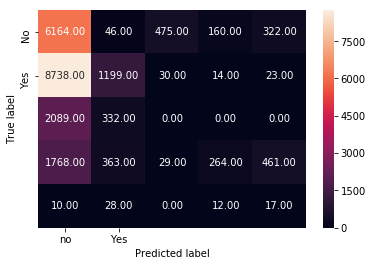

In [225]:
nb_cm = metrics.confusion_matrix(y_test,nb_clf.predict(X_test) )
sn.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [226]:
print(metrics.classification_report(y_test,nb_clf.predict(X_test)))

              precision    recall  f1-score   support

        ddos       0.33      0.86      0.48      7167
      normal       0.61      0.12      0.20     10004
       probe       0.00      0.00      0.00      2421
         r2l       0.59      0.09      0.16      2885
         u2r       0.02      0.25      0.04        67

   micro avg       0.34      0.34      0.34     22544
   macro avg       0.31      0.27      0.17     22544
weighted avg       0.45      0.34      0.26     22544



In [227]:
print(metrics.classification_report(undersampled_y,nb_clf.predict(undersampled_X)))

              precision    recall  f1-score   support

        ddos       0.38      1.00      0.55        52
      normal       0.04      0.06      0.05        52
       probe       0.27      0.08      0.12        52
         r2l       0.05      0.02      0.03        52
         u2r       0.73      0.15      0.25        52

   micro avg       0.26      0.26      0.26       260
   macro avg       0.29      0.26      0.20       260
weighted avg       0.29      0.26      0.20       260



## Random Forest

In [695]:
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier(oob_score=True,n_estimators=70,max_features=15, n_jobs=-1,random_state = 12)
radm_clf.fit(undersampled_X, undersampled_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
            oob_score=True, random_state=12, verbose=0, warm_start=False)

In [696]:
radm_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': radm_clf.predict( X_test ) } )

metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.7811834634492548

In [697]:
print(metrics.classification_report(y_test,radm_test_pred.predicted))

              precision    recall  f1-score   support

        ddos       0.89      0.78      0.83      7167
      normal       0.93      0.88      0.91     10004
       probe       0.47      0.69      0.56      2421
         r2l       0.56      0.51      0.53      2885
         u2r       0.09      0.73      0.16        67

   micro avg       0.78      0.78      0.78     22544
   macro avg       0.59      0.72      0.60     22544
weighted avg       0.82      0.78      0.79     22544



In [698]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100],
                'max_features': [8,9,10,11,12,13,14,15],
                'max_depth' : [3,4,5,6,7,8,9,10]}

from sklearn.model_selection import GridSearchCV
gscv_Rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [699]:
gscv_Rf.fit(undersampled_X,undersampled_y)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:   36.7s finished
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 60, 70, 80, 90, 100], 'max_features': [8, 9, 10, 11, 12, 13, 14, 15], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [700]:
gscv_Rf.best_params_

{'max_depth': 9, 'max_features': 9, 'n_estimators': 80}

In [716]:
rdm_final = RandomForestClassifier(n_estimators=80,max_depth=9,max_features=8,random_state=54,n_jobs=-1)

In [717]:
rdm_final.fit(undersampled_X,undersampled_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=54, verbose=0, warm_start=False)

In [718]:
print(metrics.classification_report(y_test,rdm_final.predict(X_test)))

              precision    recall  f1-score   support

        ddos       0.98      0.78      0.87      7167
      normal       0.88      0.89      0.88     10004
       probe       0.48      0.75      0.58      2421
         r2l       0.61      0.50      0.55      2885
         u2r       0.07      0.73      0.13        67

   micro avg       0.79      0.79      0.79     22544
   macro avg       0.61      0.73      0.60     22544
weighted avg       0.83      0.79      0.80     22544



In [719]:
print(metrics.classification_report(undersampled_y,rdm_final.predict(undersampled_X)))

              precision    recall  f1-score   support

        ddos       1.00      1.00      1.00        52
      normal       1.00      1.00      1.00        52
       probe       1.00      1.00      1.00        52
         r2l       1.00      1.00      1.00        52
         u2r       1.00      1.00      1.00        52

   micro avg       1.00      1.00      1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260



#### Feature Importance

In [720]:
rdm_final.feature_importances_

indices = np.argsort(rdm_final.feature_importances_)[::-1]

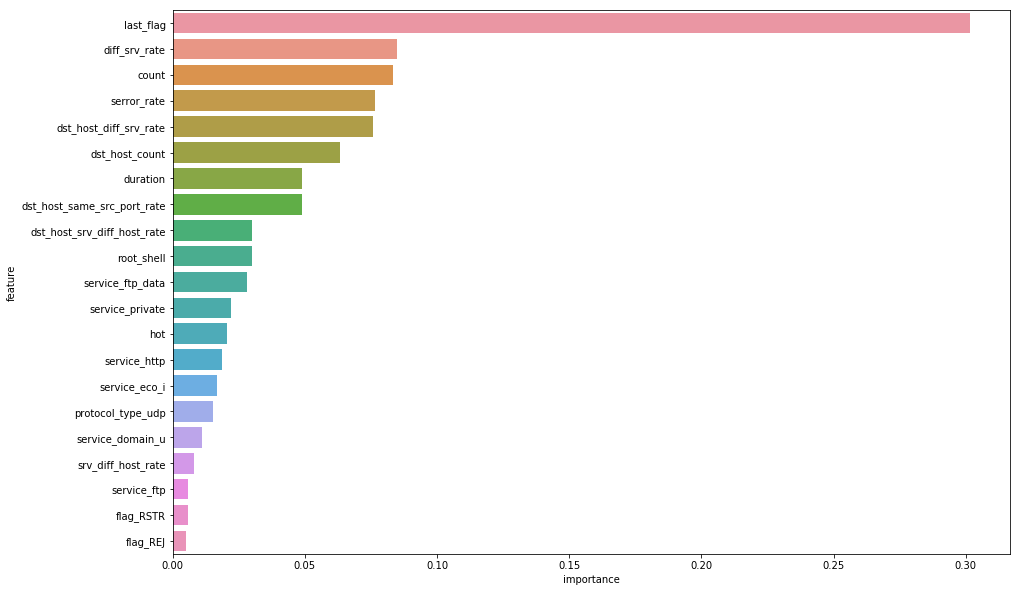

In [721]:
indices = np.argsort(rdm_final.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(undersampled_X.shape[1]):
    feature_rank.loc[f] = [f+1,
                         undersampled_X.columns[indices[f]],
                         rdm_final.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )
plt.rcParams["figure.figsize"]=15,10

### KNN

In [722]:
from sklearn.neighbors import KNeighborsClassifier

In [723]:
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11]}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5)

In [724]:
knn_clf.fit(undersampled_X, undersampled_y)



C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [3, 5, 7, 9, 11]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [725]:
knn_clf.best_score_

0.7615384615384615

In [726]:
knn_clf.best_params_

{'n_neighbors': 3}

In [727]:
knn_clf.fit(undersampled_X,undersampled_y)

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [3, 5, 7, 9, 11]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [728]:
print(metrics.classification_report(undersampled_y,knn_clf.predict(undersampled_X)))

              precision    recall  f1-score   support

        ddos       0.77      0.90      0.83        52
      normal       0.89      0.75      0.81        52
       probe       0.74      0.77      0.75        52
         r2l       0.96      0.87      0.91        52
         u2r       0.91      0.94      0.92        52

   micro avg       0.85      0.85      0.85       260
   macro avg       0.85      0.85      0.85       260
weighted avg       0.85      0.85      0.85       260



In [729]:
print(metrics.classification_report(y_test,knn_clf.predict(X_test)))

              precision    recall  f1-score   support

        ddos       0.79      0.66      0.72      7167
      normal       0.82      0.71      0.76     10004
       probe       0.25      0.59      0.35      2421
         r2l       0.27      0.09      0.14      2885
         u2r       0.03      0.57      0.06        67

   micro avg       0.60      0.60      0.60     22544
   macro avg       0.43      0.52      0.40     22544
weighted avg       0.68      0.60      0.62     22544

